
### 공원총면적

```

```

In [1]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from backup.module.preprocess import drop_columns

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')  # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'AppleGothic'})  # 폰트 설정
plt.rc('font', family='AppleGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;

warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
# sys.path를 수정하여 모듈 경로를 설정
import sys
import os
import pandas as pd

# 프로젝트 루트 경로 추가
project_root = os.path.abspath("..")
sys.path.append(project_root)
# 모든 컬럼 출력 설정
# pd.set_option('display.max_columns', None)
# 모든 행 출력 설정
# pd.set_option('display.max_rows', None)

import module

In [3]:
df, df_test_y = module.file_load.load_current_version()

In [4]:
df.columns

Index(['index', '시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층',
       '건축년도', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '금리_단기1년전차이',
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분', '평수', '층_그룹', '평수_그룹', '시', '구', '동',
       '아파트ID', '아파트ID거리', 'nearest_park_distance', '가까운공원이름', '가까운공원ID',
       '공원갯수', '공원총면적', '공원생활권점수', '산책로갯수', '산책로총길이', '산책생활권점수', '생태문화길갯수',
       '생태문화길총길이', '생태문화생활권점수', '한강지천길갯수', '한강지

In [5]:
df['is_test'].value_counts()  # train과 test data가 하나로 합쳐진 것을 확인할 수 있습니다.

is_test
0    1097155
1       5607
Name: count, dtype: int64

In [6]:
df['거래년월일'] = pd.to_datetime(df['계약년월'].astype(str) + df['계약일'].astype(str), format='%Y%m%d')

In [7]:
df.columns

Index(['index', '시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층',
       '건축년도', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '금리_단기1년전차이',
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분', '평수', '층_그룹', '평수_그룹', '시', '구', '동',
       '아파트ID', '아파트ID거리', 'nearest_park_distance', '가까운공원이름', '가까운공원ID',
       '공원갯수', '공원총면적', '공원생활권점수', '산책로갯수', '산책로총길이', '산책생활권점수', '생태문화길갯수',
       '생태문화길총길이', '생태문화생활권점수', '한강지천길갯수', '한강지

In [8]:
# 결측치가 많거나 필요 없는 컬럼을 정리한다
drop_columns = [
    'index', '시군구', '본번', '부번',
    '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
    'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
    'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
    'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
    'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
    'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
    '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
    '사용허가여부', '관리비 업로드', '단지신청일',
    'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
    '1차버스정류장', '경과연도', '경과구분', '시',
    'nearest_park_distance',
    '가까운공원이름',
    '공원생활권점수',
    '산책로갯수',
    '산책로총길이',
    '산책생활권점수',
    '생태문화길갯수',
    '생태문화길총길이',
    '생태문화생활권점수',
    '한강지천길갯수',
    '한강지천길총길이',
    '숲세권종합점수',
    '숲세권등급',
    '한강거리',
    '지가지수',
    '아파트전세_전기대비증감률',
    '실업률',
    '민간소비',
    '소비자심리지수',
    '경제심리지수',
    '여수신 금리차',
    '계약일',
    '전용면적(㎡)',
    '공원갯수',
    '공원총면적',
    '한강지천생활권점수',
     '층_그룹', '평수_그룹',
]

# 전처리

In [9]:
df_select = module.preprocess.drop_columns(df, drop_columns)

In [10]:
df_select.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target',
       '금리_단기1년전차이', '평수', '구', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test',
       '거래년월일'],
      dtype='object')

In [11]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1102762 entries, 0 to 5606
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   번지          1102762 non-null  object        
 1   아파트명        1102762 non-null  object        
 2   계약년월        1102762 non-null  int64         
 3   층           1102762 non-null  int64         
 4   건축년도        1102762 non-null  int64         
 5   도로명         1102762 non-null  object        
 6   좌표X         1102762 non-null  float64       
 7   좌표Y         1102762 non-null  float64       
 8   target      1097155 non-null  float64       
 9   금리_단기1년전차이  1102762 non-null  float64       
 10  평수          1102762 non-null  int64         
 11  구           1102762 non-null  object        
 12  동           1102762 non-null  object        
 13  아파트ID       1102762 non-null  object        
 14  아파트ID거리     1102762 non-null  float64       
 15  가까운공원ID     1102762 non-null  object    

In [12]:
module.preprocess.아파트_unique_key_add(df_select)
# 아파트_unique_key

In [13]:
df_select['거래년월주'] = (
    df_select['거래년월일'].dt.isocalendar().year.astype(str) +
    df_select['거래년월일'].dt.isocalendar().week.astype(str).str.zfill(2)
)

In [14]:
df_select_train = df_select.query('is_test == 0')
df_select_test = df_select.query('is_test == 1')

df_select_train.shape, df_select_test.shape

((1097155, 20), (5607, 20))

In [15]:
df_select_train['거래년월주']

0          201749
1          201751
2          201752
3          201801
4          201802
            ...  
1097150    200728
1097151    200734
1097152    200735
1097153    200737
1097154    200702
Name: 거래년월주, Length: 1097155, dtype: object

In [16]:
df_select_train.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target',
       '금리_단기1년전차이', '평수', '구', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test',
       '거래년월일', '아파트_unique_key', '거래년월주'],
      dtype='object')

In [17]:
# 2. 아파트_unique_key와 거래년월주 기준으로 평균 계산
weekly_avg = (
    df_select_train
    .groupby([
        '번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y',
       '금리_단기1년전차이', '평수', '구', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test',
       '거래년월일', '아파트_unique_key', '거래년월주'
    ])['target']
    .mean()  # 'target' 열만 평균 계산
    .reset_index()  # 인덱스 리셋
)
weekly_avg['target'] = weekly_avg['target'].astype(int)

In [18]:
weekly_avg.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', '금리_단기1년전차이',
       '평수', '구', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test', '거래년월일',
       '아파트_unique_key', '거래년월주', 'target'],
      dtype='object')

In [19]:
weekly_avg = weekly_avg.drop(['아파트_unique_key'], axis=1)

In [20]:
print(weekly_avg.shape)
print(weekly_avg.columns)

(1088318, 19)
Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', '금리_단기1년전차이',
       '평수', '구', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test', '거래년월일',
       '거래년월주', 'target'],
      dtype='object')


In [21]:
df_select = pd.concat([weekly_avg, df_select_test])

In [22]:
df_select.shape

(1093925, 20)

In [23]:
df_select['is_test'].value_counts()

is_test
0    1088318
1       5607
Name: count, dtype: int64

In [24]:
df_select.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', '금리_단기1년전차이',
       '평수', '구', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test', '거래년월일',
       '거래년월주', 'target', '아파트_unique_key'],
      dtype='object')

In [25]:
df_select = df_select.drop(['아파트_unique_key', '거래년월일', '계약년월',], axis=1)

In [26]:
module.preprocess.번지_본번_부번_결측채우기(df_select)
module.preprocess.한강거리_add(df_select)

In [27]:
df_select.columns

Index(['번지', '아파트명', '층', '건축년도', '도로명', '좌표X', '좌표Y', '금리_단기1년전차이', '평수', '구',
       '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test', '거래년월주', 'target',
       '한강거리'],
      dtype='object')

# 파생변수

In [28]:
gangnam_8_schools = ['강남구', '서초구', '송파구']
df_select['학군'] = df_select['구'].apply(lambda x: 1 if x in gangnam_8_schools else 0)

In [29]:
final_drop_columns = []
df_select.drop(final_drop_columns, axis=1, inplace=True)

In [31]:
df_select.isnull().sum()

번지               0
아파트명             0
층                0
건축년도             0
도로명              0
좌표X              0
좌표Y              0
금리_단기1년전차이       0
평수               0
구                0
동                0
아파트ID            0
아파트ID거리          0
가까운공원ID          0
is_test          0
거래년월주            0
target        5607
한강거리             0
학군               0
dtype: int64

# Model Training

## 범주형 변수 Encoding

In [32]:
model_data = df_select.copy()

In [33]:
model_data.columns

Index(['번지', '아파트명', '층', '건축년도', '도로명', '좌표X', '좌표Y', '금리_단기1년전차이', '평수', '구',
       '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test', '거래년월주', 'target',
       '한강거리', '학군'],
      dtype='object')

In [42]:
model_data.isnull().sum()

번지               0
아파트명             0
층                0
건축년도             0
도로명              0
좌표X              0
좌표Y              0
금리_단기1년전차이       0
평수               0
구                0
동                0
아파트ID            0
아파트ID거리          0
가까운공원ID          0
is_test          0
거래년월주            0
target        5607
한강거리             0
학군               0
dtype: int64

In [34]:
dt_train, dt_test = module.preprocess.split_train_test(model_data)
categorical_columns_v2 = module.preprocess.범주형_filter(dt_train)
label_encoders = module.preprocess.범주형_encoding(dt_train, dt_test, categorical_columns_v2)
print(dt_train.shape, dt_test.shape)

100%|██████████| 8/8 [00:01<00:00,  5.73it/s]

(1088318, 18) (5607, 18)


## Model Training


# 훈련데이터 분할

In [35]:
X_train, X_val, y_train, y_val = module.preprocess.holdout_split_X_y(dt_train)

In [36]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((870654, 17), (217664, 17), (870654,), (217664,))

In [37]:
X_train.head(1)

,번지,아파트명,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,구,동,아파트ID,아파트ID거리,가까운공원ID,거래년월주,한강거리,학군
988199,5755,1314,6,2000,1999,127.049493,37.646533,-0.25,25,9,277,855,16.981446,504,502,11049.119638,0


In [38]:
X_test = dt_test.drop(['target'], axis=1)

# LGBMRegressor 모델 선언 시 파라미터 추가
lgbr = lgb.LGBMRegressor(
    boosting_type='dart',  # 부스팅 타입 (기본값: 'gbdt')
    num_leaves=258,  # 리프 노드의 최대 개수 (기본값: 31)
    max_depth=8,  # 트리의 최대 깊이 (-1은 제한 없음)
    learning_rate=0.07224290084064122,  # 학습률 (기본값: 0.1)
    n_estimators=301,  # 부스팅 반복 횟수 (기본값: 100)
    min_child_samples=5,  # 자식 노드를 분할하기 위한 최소 데이터 수 (기본값: 20)
    subsample=0.9773487107075421,  # 데이터 샘플링 비율 (기본값: 1.0)
    colsample_bytree=0.9011817947068029,  # 트리 생성 시 feature 샘플링 비율 (기본값: 1.0)
    reg_alpha=0.04063525938772354,
    reg_lambda=0.0014482851327836004,
    random_state=42  # 랜덤 시드
)

# 모델 학습
lgbr.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3005
[LightGBM] [Info] Number of data points in the train set: 870654, number of used features: 17
[LightGBM] [Info] Start training from score 57045.278821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

LGBMRegressor(boosting_type='dart', colsample_bytree=0.9011817947068029,
              learning_rate=0.07224290084064122, max_depth=8,
              min_child_samples=5, n_estimators=301, num_leaves=258,
              random_state=42, reg_alpha=0.04063525938772354,
              reg_lambda=0.0014482851327836004, subsample=0.9773487107075421)

In [39]:
model = lgbr

In [40]:
# 검증 데이터로 예측
real_test_pred = lgbr.predict(X_test)
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(df_test_y, real_test_pred))}')
# s : RMSE test: 22522.447464776706
# 기존 한강거리 : 22000 , 22055
# 공원총면적 : 22080
# 공원총갯수 : 22080
# 한강지천길갯수 22239
# 평수 층 주간 23152
#  '층_그룹', '평수_그룹', 평 층 삭제 : 24227
# 평수 주간 : 23501
# '구' 추가 : 

RMSE test: 22415.932113631014


In [41]:
X_test.shape, real_test_pred.shape, df_test_y.shape

((5607, 17), (5607,), (5607, 1))

In [450]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

In [451]:
X_val = X_test.reset_index(drop=True)
X_val

,층,평수,거래년월주,건축년도,좌표X,좌표Y,금리_단기1년전차이,아파트ID거리,번지,아파트명,도로명,구,동,아파트ID,가까운공원ID,한강거리,학군
0,10,22,832,1983.0,127.068028,37.487802,2.25,0.000000,458,113,1040,1,7,761,1043,3113.804133,1
1,3,25,829,1983.0,127.072682,37.489122,2.25,45.380282,454,114,106,1,7,760,1091,2867.571730,1
2,10,25,833,1983.0,127.072682,37.489122,2.50,45.380282,454,114,106,1,7,760,1091,2867.571730,1
3,7,18,819,2019.0,127.064151,37.480049,1.75,117.916314,191,520,1172,1,7,156,1064,3968.559871,1
4,8,25,828,2019.0,127.064151,37.480049,2.25,117.916314,191,520,1172,1,7,156,1064,3968.559871,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,4,25,805,2021.0,126.891951,37.584794,1.25,0.000000,891,12,1256,22,123,107,488,2881.698680,0
5603,6,25,806,2021.0,126.891951,37.584794,1.25,0.000000,891,12,1256,22,123,107,488,2881.698680,0
5604,7,25,807,2021.0,126.891951,37.584794,1.25,0.000000,891,12,1256,22,123,107,488,2881.698680,0
5605,4,25,815,2021.0,126.891951,37.584794,1.75,0.000000,891,12,1256,22,123,107,488,2881.698680,0


In [452]:
X_val['target'] = df_test_y
X_val['pred'] = real_test_pred
X_val['예측차이'] = X_val['target'] - X_val['pred']
# RMSE 계산
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val.sort_values(by='error', ascending=False)  # 내림차순 sorting

In [453]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(1000)  # 예측을 잘 하지못한 top 100개의 data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(1000)  # 예측을 잘한 top 100개의 data

In [454]:
# 해석을 위해 레이블인코딩 된 변수를 복원해줍니다.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2:  # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2:  # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [455]:
# error_top100.to_csv('8_error.csv', index=False)
# best_top100.to_csv('8_top.csv', index=False)

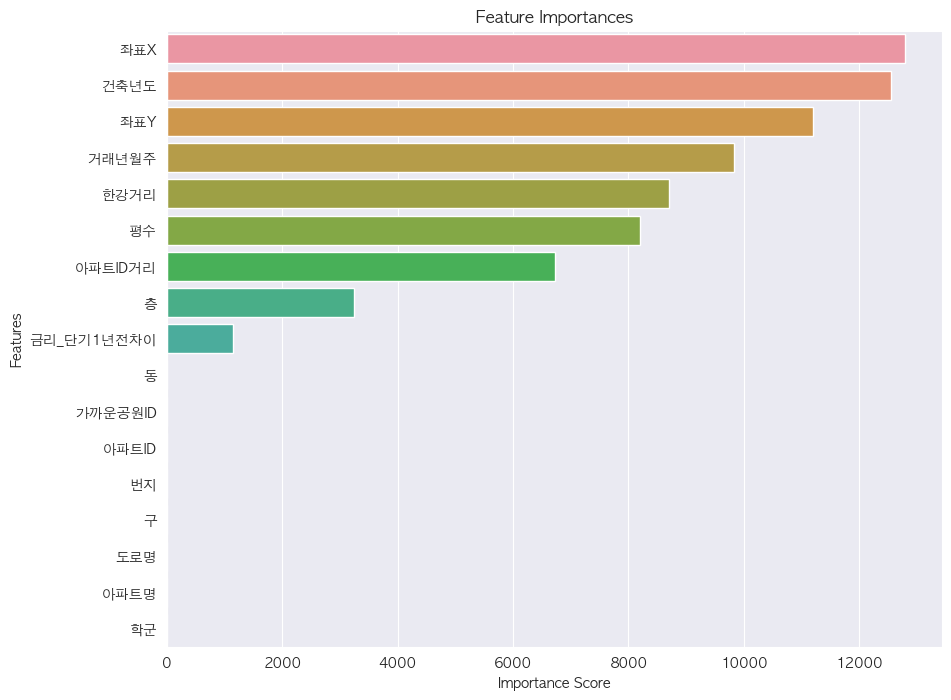

In [456]:
# Feature Importances 추출 및 정렬
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

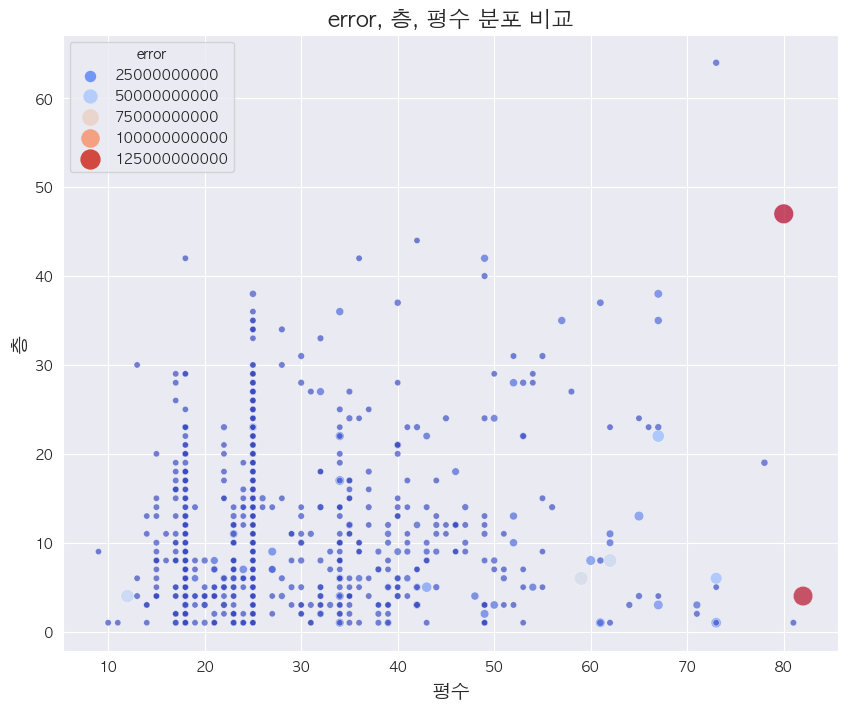

In [457]:
# 2D 히트맵으로 target, 층, 전용면적의 분포 비교
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=error_top100,
    x='평수',
    y='층',
    size='error',
    hue='error',
    palette='coolwarm',
    alpha=0.7,
    sizes=(20, 200)
)
plt.title('error, 층, 평수 분포 비교', fontsize=16)
plt.xlabel('평수', fontsize=14)
plt.ylabel('층', fontsize=14)
plt.legend(title='error')
plt.grid(True)
plt.show()

In [458]:
print(error_top100['층'].value_counts().sort_values(ascending=False))
print(error_top100['평수'].value_counts())

층
4     73
3     60
1     58
6     54
8     54
2     49
11    48
5     47
9     47
7     47
12    45
15    40
13    40
10    38
14    37
17    32
16    25
19    23
20    22
18    20
22    18
21    18
23    16
24    13
29    11
27    10
25     9
28     9
26     7
34     4
30     4
35     4
42     3
31     3
37     2
36     2
38     2
33     2
47     1
40     1
64     1
44     1
Name: count, dtype: int64
평수
25    449
18    112
34     36
23     32
17     27
     ... 
48      1
60      1
12      1
59      1
9       1
Name: count, Length: 64, dtype: int64


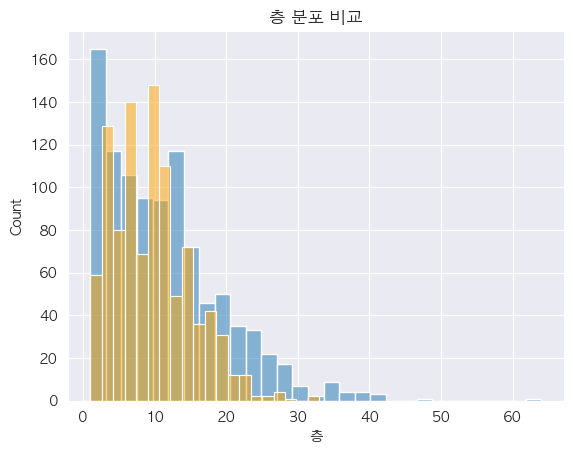

In [65]:
sns.histplot(data=error_top100, x='층', alpha=0.5)
sns.histplot(data=best_top100, x='층', color='orange', alpha=0.5)
plt.title('층 분포 비교')
plt.show()

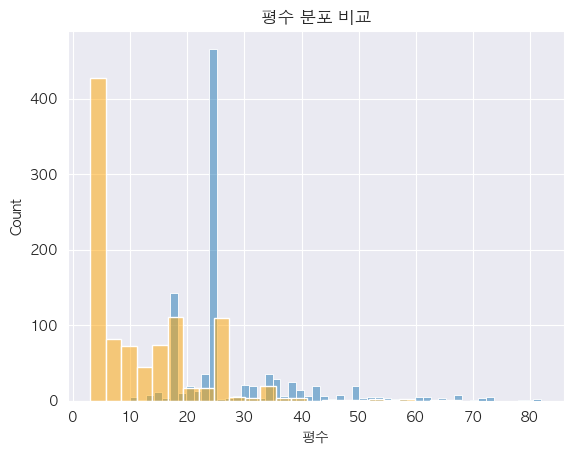

In [66]:
sns.histplot(data=error_top100, x='평수', alpha=0.5)
sns.histplot(data=best_top100, x='평수', color='orange', alpha=0.5)
plt.title('평수 분포 비교')
plt.show()

In [67]:
error_top100

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,...,아파트ID,아파트ID거리,가까운공원ID,공원총면적,한강거리,학군,target,pred,예측차이,error
4881,685-700,아크로서울포레스트,202209,47,2020,왕십리로 83-21,127.043847,37.544464,1.75,80,...,A10024503,33.425547,P00357,734507.80,1034.605382,0,1300000.0,1.001946e+06,298054.056480,8.883622e+10
2201,1496-24,트라움하우스3,202212,4,2002,명달로 97-14,127.002921,37.486202,2.25,82,...,A13784102,391.153802,P02373,675685.00,2477.029577,1,640000.0,3.675714e+05,272428.624773,7.421736e+10
3272,829,나인원한남,202211,8,2019,한남대로 91,127.003365,37.536254,2.25,62,...,A10025192,21.526349,P00235,61280.06,1300.651674,0,945000.0,7.560776e+05,188922.404476,3.569167e+10
4810,612-28,비버리힐즈,202207,1,1998,사평대로12길 27,126.992966,37.496919,1.75,73,...,A13783001,286.231418,P02477,37176.60,1119.412412,1,450000.0,2.660601e+05,183939.875901,3.383388e+10
3633,193-1,힐데스하임빌라,202207,6,1998,남부순환로377길 26,127.045027,37.488125,1.75,73,...,A13527004,138.420534,P02556,236054.10,3725.539043,1,500000.0,3.165523e+05,183447.741336,3.365307e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,4955,신길센트럴아이파크,202301,20,2019,가마산로 426,126.903760,37.504119,2.25,18,...,A10025562,0.003513,P02044,67905.20,3680.190535,0,90000.0,1.149746e+05,-24974.596315,6.237305e+08
1444,1003,래미안위브,202211,15,2014,답십리로 130,127.052370,37.572852,2.50,25,...,A13003007,0.003100,P00484,211340.00,3974.682514,0,105000.0,1.299706e+05,-24970.642921,6.235330e+08
1496,690,래미안크레시티,202212,6,2014,사가정로 65,127.049688,37.575524,2.25,25,...,A13071302,0.001900,P00473,50793.90,4159.586251,0,105000.0,1.299661e+05,-24966.142649,6.233083e+08
4593,501,대림,202208,5,1993,여의대방로44길 10,126.924712,37.507295,1.75,18,...,A15681110,8.892207,P02128,451060.70,2885.026148,0,110000.0,8.503940e+04,24960.598822,6.230315e+08


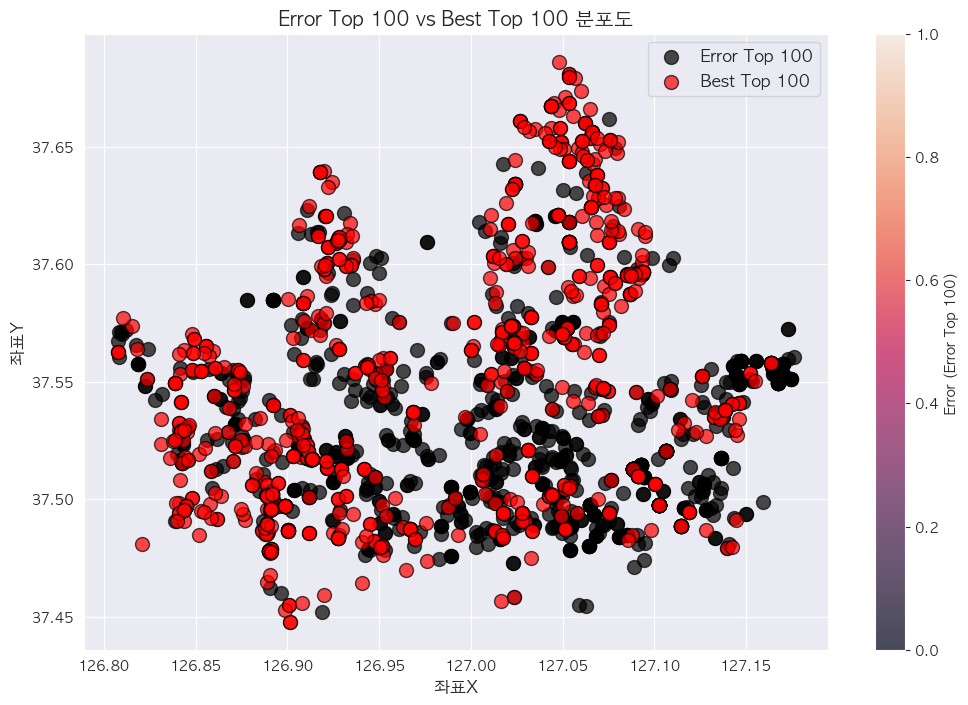

In [68]:

# 그래프 생성
plt.figure(figsize=(12, 8))

# error_top100 산점도
scatter1 = plt.scatter(
    error_top100['좌표X'], error_top100['좌표Y'],
    c='black', s=100, edgecolor='k', alpha=0.7, label='Error Top 100'
)

# best_top100 산점도
scatter2 = plt.scatter(
    best_top100['좌표X'], best_top100['좌표Y'],
    c='red', s=100, edgecolor='k', alpha=0.7, label='Best Top 100'
)

# 컬러바 추가 (error_top100용)
plt.colorbar(scatter1, label='Error (Error Top 100)')

# 축 및 제목 설정
plt.xlabel('좌표X', fontsize=12)
plt.ylabel('좌표Y', fontsize=12)
plt.title('Error Top 100 vs Best Top 100 분포도', fontsize=14)
plt.grid(True)

# 범례 추가
plt.legend(fontsize=12)

# 그래프 표시
plt.show()